<a href="https://colab.research.google.com/github/ClintJensen/DrawingsProject/blob/master/code/ConvNet/ConvNet_VGG_19_Drawings_fc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Feature extraction from VGG19 architecture layers with weights pre-trained on ImageNet

In [1]:
# Here we use Keras API to process the data by using VGG19 
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd 


### When loading pretrained model output

In [2]:
#Loading a pretrained model
#base_model = tf.keras.models.load_model("vgg19_trained.h5")

# The code below produces this error 
# OSError: SavedModel file does not exist at: vgg19_trained.h5/{saved_model.pbtxt|saved_model.pb}

### When loading ImageNet as a starting point

In [3]:
# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

574726144/574710816 [==============================] - 7s 0us/step


## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [4]:
#To save model locally run this:
#base_model.save("vgg19_trained.h5")

## Model Architecture with layer names

In [5]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### The following code is useful if you have downloaded the images into your Drive folder or want to save output from this neural network in a Drive folder.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# When running Colab locally

### The following code is useful if you have the images in a local directory.

In [7]:
from google.colab import files

### Code to upload local image files to Colab

- After running the code below, navigate to the folder that holds all the images. Select all the images, and click on the 'open' button.

In [8]:
# Code to upload local image files to Colab
uploaded = files.upload()

Saving DAM001_F_DAPedit.png to DAM001_F_DAPedit.png
Saving DAM001_P_DAPedit.png to DAM001_P_DAPedit.png
Saving DAM001_T_DAPedit.png to DAM001_T_DAPedit.png
Saving DAM002_F_DAPedit.png to DAM002_F_DAPedit.png
Saving DAM002_P_DAPedit.png to DAM002_P_DAPedit.png
Saving DAM002_T_DAPedit.png to DAM002_T_DAPedit.png
Saving DAM003_F_DAPedit.png to DAM003_F_DAPedit.png
Saving DAM003_P_DAPedit.png to DAM003_P_DAPedit.png
Saving DAM003_T_DAPedit.png to DAM003_T_DAPedit.png
Saving DAM3D002_P_DAPedit.png to DAM3D002_P_DAPedit.png
Saving DAM3D003_F_DAPedit.png to DAM3D003_F_DAPedit.png
Saving DAM3D005_T_DAPedit.png to DAM3D005_T_DAPedit.png
Saving DAM3D006_P_DAPecit.png to DAM3D006_P_DAPecit.png
Saving DAM3D007_P_DAPedit.png to DAM3D007_P_DAPedit.png
Saving DAM3D008_T_DAPedit.png to DAM3D008_T_DAPedit.png
Saving DAM3D009_T_DAPedit.png to DAM3D009_T_DAPedit.png
Saving DAM3D011_P_DAPedit.png to DAM3D011_P_DAPedit.png
Saving DAM3D012_P_DAPedit.png to DAM3D012_P_DAPedit.png
Saving DAM3D013_T_DAPedit.pn

# If importing images through GitHub. 

* There are some images on Github, but they are not the ones used in the most up-to-date version of the study.

In [9]:
# If images are stored in GitHub, by running this we clone the data into Colab
# Run this just once per session

#! git clone https://github.com/ClintJensen/DrawingsProject

### To view files in GitHub folder

In [10]:
# Now repo data is available in Colab local environment
#!ls DrawingsProject

In [11]:
# You can run this if you want to check the path for a single image
# ! ls DrawingsProject/data/DAP_NEXT_Images/

# Load and reshape the image to be feed into the model

In [12]:
# Load and reshape the image to be feed into the model

#Path using Tim's local network
#img_path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/DAM3D001_P_CUAedit.jpg'
#Path using Pablo's Github
#img_path = 'Drawings/data/humans_drawings/DAM001_F_DAPedit.jpg'
#Path using Clint Jensen's GitHub
#img_path = '../content/DrawingsProject/data/DAP_NEXT_Images/DAM001_F_DAPedit.png'

#path when you have loaded directly into Colab content folder
img_path = '../content/DAM001_F_DAPedit.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Selecting layer for feature extraction 

In [15]:
# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "fc2"  # let's pick the 2nd fully conected layer

# To check other layers
# feature_layer = "fc1 "
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

#### Setting up feature extraction across full model based on feature selected 

In [14]:
# Do the feature extraction
fc2_features = model.predict(x)

In [16]:
# In the graphic depiction above we can double check that shape of the feature space is correct
# Print tensor shape
print (fc2_features.shape)

(1, 4096)


In [17]:
# Print extracted feature as a tensor (i.e., feature)
# print(fc2_features)

In [18]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(fc2_features)
vgg19_feature_np.flatten()

array([0.        , 0.11682931, 1.1002786 , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

#### Output of the number of filenames

* This should be the same as the number of images you uploaded

In [19]:
# Get the drawings filenames from directory 
from os import listdir
from os.path import isfile, join

# If relative path doesn't work, change path as nedeed
# path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/'
# path = '../content/DrawingsProject/data/DAP_NEXT_Images/'

path = '../content/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield the same number of images within the image file

308

## Feature extraction from all images based on specified layer

In [20]:
# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshapes and preprocesses the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extracts the features and flattens the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())
  

In [21]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
type(vgg19_feature_list_np)
print(vgg19_feature_list_np.shape)

(308, 4096)


#### Exporting Files

In [22]:
#And write it to a csv file
#To save within the base content file of Colab
#np.savetxt("vgg19_fc2_DAP_study1_3.csv", vgg19_feature_list_np, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc2_450_256/vgg19_fc2_DAP_study1_3.csv", vgg19_feature_list_np, delimiter=",")


In [23]:
#And write filenames to a csv file
df = pd.DataFrame(filenames)

#To save within the base content file of Colab
df.to_csv("filenames_vgg19_fc2_DAP.csv")

#To save within a specific drive file update this path
df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc2_450_256/filenames_vgg19_fc2_DAP.csv")

# Hierarchical clustering on drawings with vectors extracted from VGG19

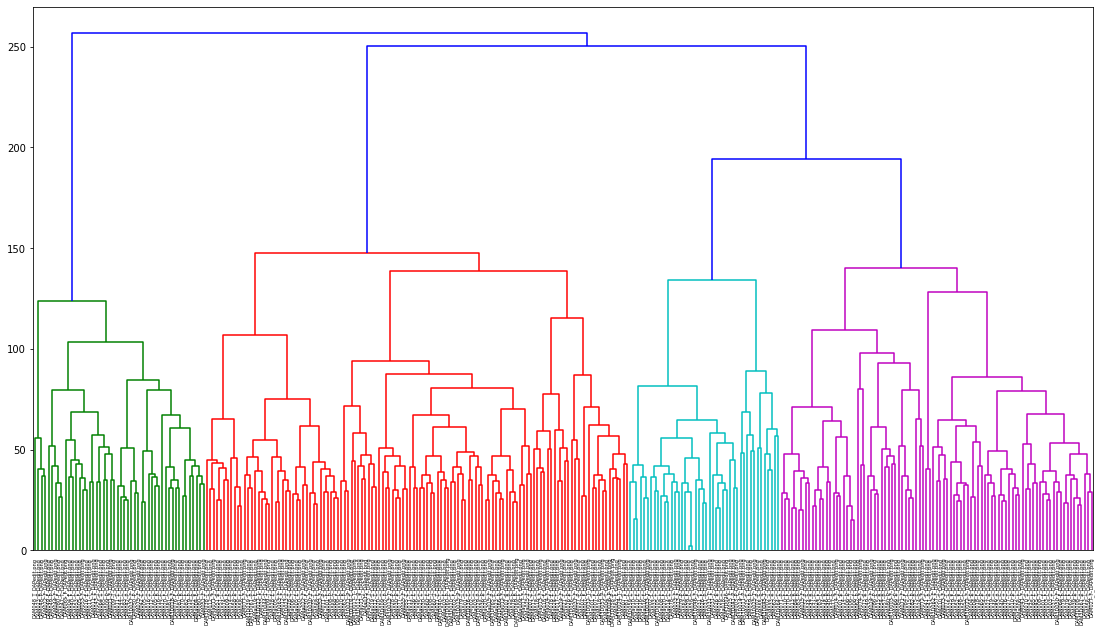

In [24]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [26]:
# Based on the dendogram, if we use 100 as a cutoff we have 14 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 14
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=14)

In [27]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[ 4  0  3  7  2  2  6  6  7  1  7 12  2  7  1  0  1  1  1  1 10  7  3  2
 13  7  2 10 10  1 11 11  7 13  1  0  3 13  5 10 11 10  0  1  4  2  2  1
  3  2  1  2  2 10 10  3  5  1  7 11  4  3 10 11  3  9  1  4  0 11  2  0
  1  3  2  7  7  7  2 12  5  8  1 10 11 12 13  2 12  4 13 13 10  2 10 11
 13  7  3  1  1  1  0  2  2  2  2  7 11 13  6  2  2  3 11  6  1  3  7 11
  7  5  1 13  2 13 11  6  2  2 11  1  7  7  3  3  5  2  2 11  7 10  3 10
  8 10 10  3  2  1 11  2 11 10  2  3  0  2 11  6  1  5 10  6  1  2  1 13
  2  1  6  7  2  2  3 12 11 12  5  6  0  2  6  7  6  9  7  9  2  7 12  0
  3  4 13  7  6  1  1  7  5  5  0 12  1 13 10  4 13  2 10  6  1  7  0  0
  0  1  0  7  4  6  1  2  3  3  1  4  7 10  1  2  2  1  5  1  7  3 10 11
  1  2 13  9  2  0  3  0  1  5  1 10  7  1  2 10  2 11  2  2  1  6 12  2
  2  2  2 13  1 12  2 12 13  3 10  4  0  1  2 10  0 11 10 10  0 10  5 13
  3 13  1  3  6  2  2  1  1  2  7  6  7  7 11  1 13  2  4  3]


#### Exporting Files

In [34]:
#And write it to a csv file

#To save within the base content file of Colab
#np.savetxt("hclustering.clusterValues_fc2.csv", hclustering.labels_, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc2_450_256/hclustering.clusterValues_fc2_14clust.csv", hclustering.labels_, delimiter=",")

In [29]:
#To save within the base content file of Colab
#pd.DataFrame(labelList).to_csv("hclustering.imageLabels_f1.csv", header=None, index=None)

#To save within a specific drive file update this path
pd.DataFrame(labelList).to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc2_450_256/hclustering.imageLabels_fc2.csv", header=None, index=None)

## Plotting drawings by cluster

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd

In [31]:
# First, let's create a 2D pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (308, 2)
             filenames_np  clusters_np
0    DAM021_T_DAPedit.png            4
1    DAM084_T_DAPedit.png            0
2    DAM071_T_DAPedit.png            3
3  DAM3D059_T_DAPedit.png            7
4   DAMa021_F_DAPedit.png            2


In [32]:
drawings_df

,filenames_np,clusters_np
0,DAM021_T_DAPedit.png,4
1,DAM084_T_DAPedit.png,0
2,DAM071_T_DAPedit.png,3
3,DAM3D059_T_DAPedit.png,7
4,DAMa021_F_DAPedit.png,2
...,...,...
303,DAM037_T_DAPedit.png,1
304,DAM047_T_DAPedit.png,13
305,DAM3D060_P _DAPedit.png,2
306,DAMa024_F_DAPedit.png,4


In [33]:
#And write it to a csv file
drawings_df = pd.DataFrame(drawings_df)

#pd.DataFrame(labelList).to_csv("drawings_df.csv", header=None, index=None)

#To save within the base content file of Colab
drawings_df.to_csv("drawings_df_fc2_14clust.csv", index=None)

#To save within a specific drive file update this path
drawings_df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_fc2_450_256/drawings_df_fc2_14clust.csv", index=None)

### Subsetting for Cluster Groups


In [35]:
# Let's subset the dataframe into 11 dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster

cluster_1 = subCluster(0)
print("Length cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Length cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Length cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Length cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Length cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Length cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Length cluster 7: ", len(cluster_7))
print(cluster_7.head())

cluster_8 = subCluster(7)
print("Length cluster 8: ", len(cluster_8))
print(cluster_8.head())

cluster_9 = subCluster(8)
print("Length cluster 8: ", len(cluster_9))
print(cluster_9.head())

cluster_10 = subCluster(9)
print("Length cluster 10: ", len(cluster_10))
print(cluster_10.head())

cluster_11 = subCluster(10)
print("Length cluster 11: ", len(cluster_11))
print(cluster_11.head())

cluster_12 = subCluster(11)
print("Length cluster 12: ", len(cluster_11))
print(cluster_12.head())

cluster_13 = subCluster(12)
print("Length cluster 13: ", len(cluster_11))
print(cluster_13.head())

cluster_14 = subCluster(13)
print("Length cluster 14: ", len(cluster_11))
print(cluster_14.head())

Length cluster 1:  20
            filenames_np  clusters_np
1   DAM084_T_DAPedit.png            0
15  DAM084_F_DAPedit.png            0
35  DAM054_P_DAPedit.png            0
42  DAM024_F_DAPedit.png            0
68  DAM075_P_DAPedit.png            0
Length cluster 2:  47
              filenames_np  clusters_np
9     DAM057_F_DAPedit.png            1
14  DAM3D050_F_DAPedit.png            1
16    DAM004_P_DAPedit.png            1
17    DAM062_F_DAPedit.png            1
18    DAM025_P_DAPedit.png            1
Length cluster 3:  56
              filenames_np  clusters_np
4    DAMa021_F_DAPedit.png            2
5   DAM3D066_P_DAPedit.png            2
12  DAM3D020_T_DAPedit.png            2
23    DAM035_P_DAPedit.png            2
26    DAM078_P_DAPedit.png            2
Length cluster 4:  26
            filenames_np  clusters_np
2   DAM071_T_DAPedit.png            3
22  DAM081_T_DAPedit.png            3
36  DAM080_T_DAPedit.png            3
48  DAM005_P_DAPedit.png            3
55  DAM042_T_D

In [36]:
# Let's check cluster size to get a better idea of how to 
# layout the grid for plotting

print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))
print(len(cluster_4))
print(len(cluster_5))
print(len(cluster_6))
print(len(cluster_7))
print(len(cluster_8))
print(len(cluster_9))
print(len(cluster_10))
print(len(cluster_11))
print(len(cluster_12))
print(len(cluster_13))
print(len(cluster_14))

20
47
56
26
11
12
17
32
2
4
28
22
11
20


## Function based approach to save plots for each cluster

In [44]:
#########################################
# Function to save plots for each cluster
#########################################


def plotClusters(cluster, nrows, ncols, save_path, cluster_name):
    '''Plot images for a clusterin a grid.
     
     Arguments:
     cluster      -- cluster dtaframe name
     nrows        -- number of rows in the plot
     ncols        -- number of cols in the plot
     save_path    -- string path name to save plot
     cluster_name -- string name to save plot 
    '''
    assert isinstance(cluster, pd.DataFrame), "cluster is not pandas dataframe"
    assert isinstance(nrows, int)
    assert isinstance(ncols, int)
    assert isinstance(save_path, str)
    assert isinstance(cluster_name, str)
    
    # Image parameters
    width = 10
    height = 10
    fig=plt.figure(figsize=(18, 18)) 
    
    # We need to create a counter to loop over images and allocate 
    # the image in the right position in the grid
    pic_index = 0 
    
    # Loop over each pic and plot it in the the grid
    # .iterrows() is a method that works with pandas dataframes
    for index, row in (cluster.iterrows()): 
      pic_index += 1
      # Create grid to plot images
      fig.add_subplot(nrows, ncols, pic_index)
      img_path = path + row['filenames_np']
      img=mpimg.imread(img_path)
      imgplot = plt.imshow(img)
      # get rid off axis and grid within each pic
      plt.axis('off')
    save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    
    
    plt.savefig(save_path+cluster_name+'.png', bbox_inches='tight')
    plt.show()

### Plot Cluster 1

In [45]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_1))

20


FileNotFoundError: ignored

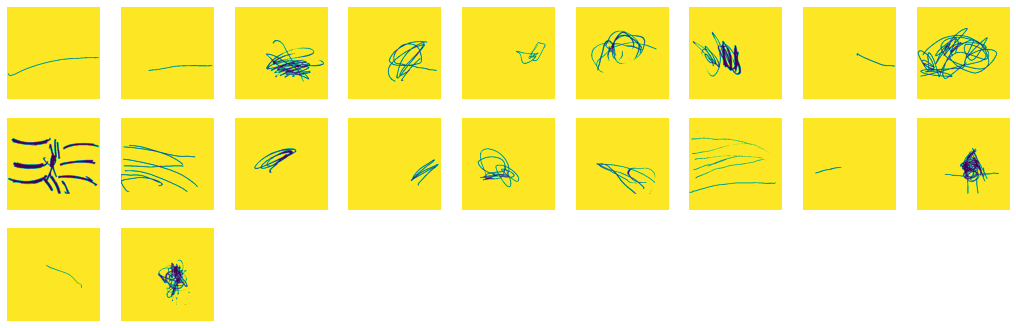

In [46]:
################################
# Plot cluster 1 Function approach
################################

# pick the cluster to plot
cluster = cluster_1

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_256_256/'
    

cluster_name = 'cluster_1'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # pick the cluster to plot
# cluster = cluster_1

# # Define grid shape parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 



# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')
# plt.savefig('cluster_1_fc2_drawings_DAP.png', dpi=200)
# plt.show()


### Plot Cluster 2

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_2))

39


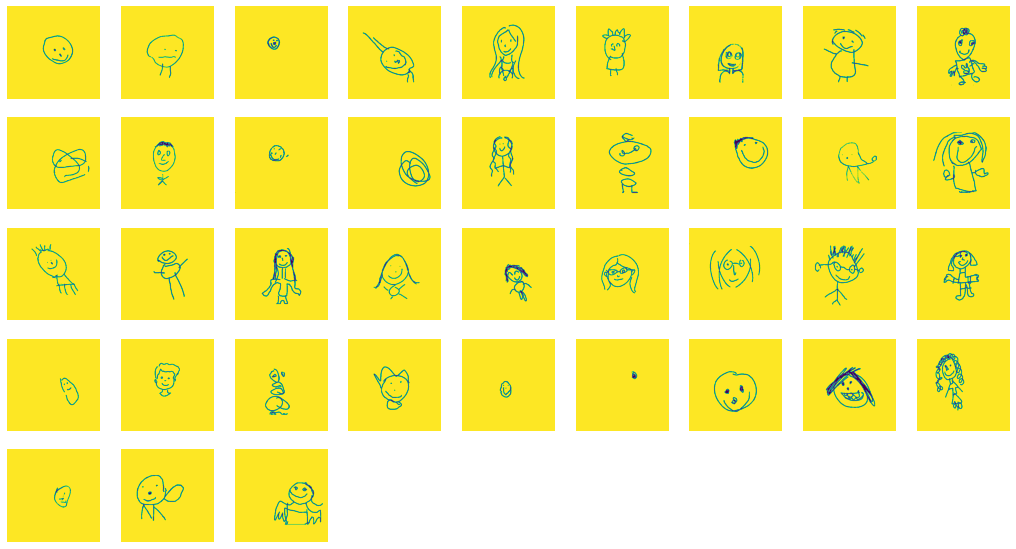

In [ ]:
################################
# Plot cluster 2 Function approach
#################_###############

# pick the cluster to plot
cluster = cluster_2

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_2'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 2

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_2

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_2_fc2_drawings_DAP.png', dpi=200)
# plt.show()


### Plot Cluster 3

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_3))

56


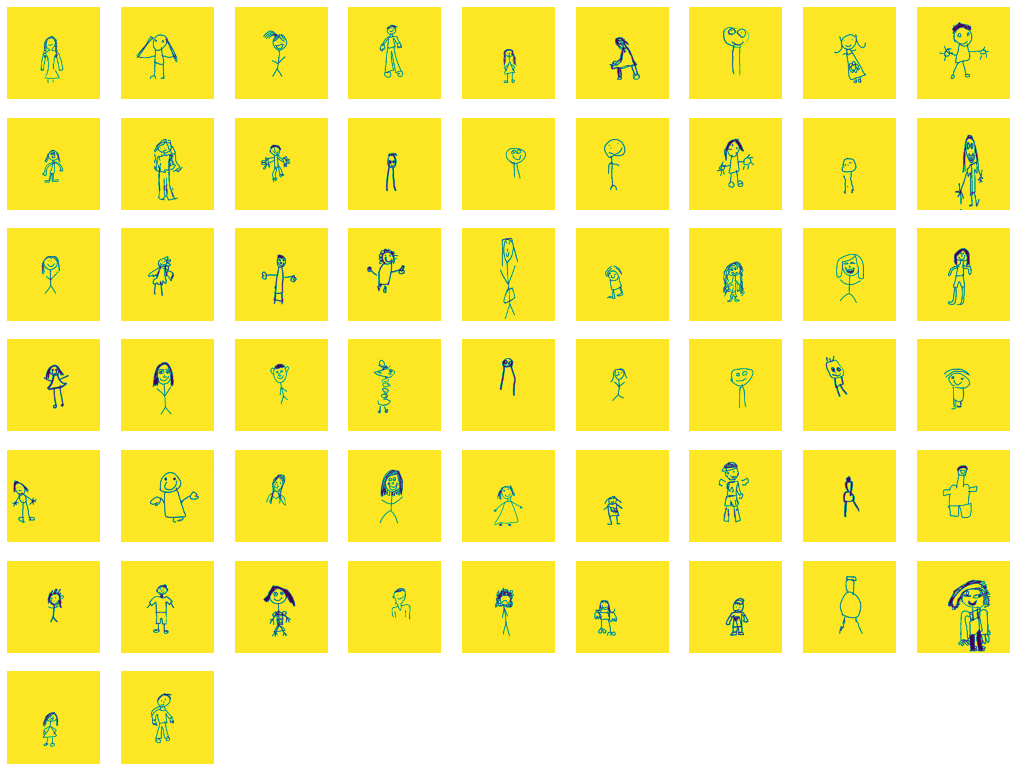

In [ ]:
################################
# Plot cluster 3 Function approach
################################

# pick the cluster to plot
cluster = cluster_3

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_3'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 3

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_3

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_3_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 4

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_4))

47


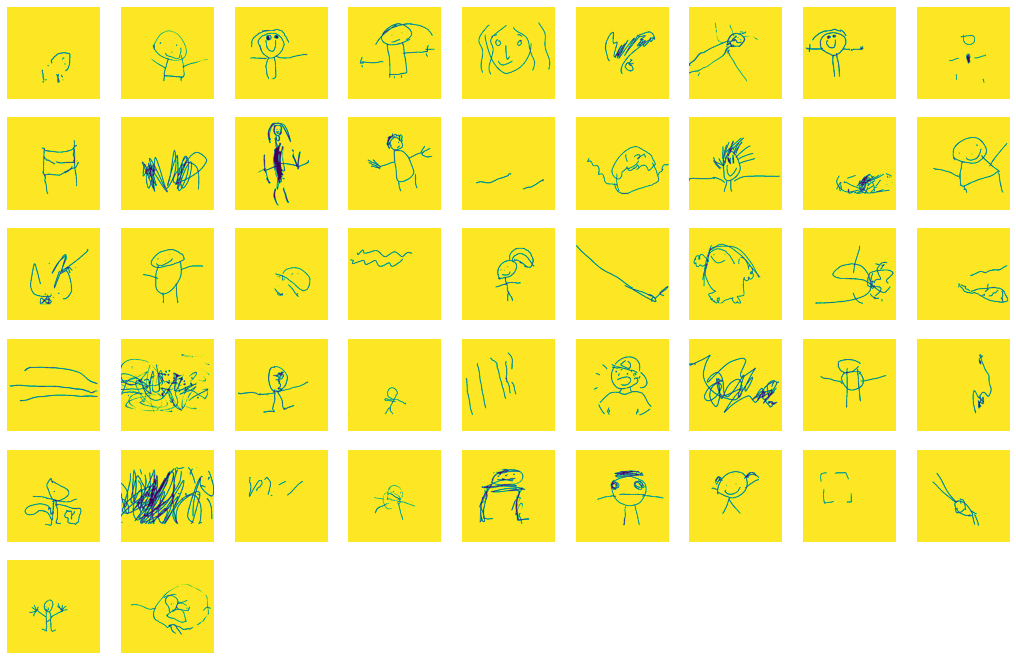

In [ ]:
################################
# Plot cluster 4 Function approach
################################

# pick the cluster to plot
cluster = cluster_4

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_4'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 4

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_4

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)

#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_4_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 5

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_5))

46


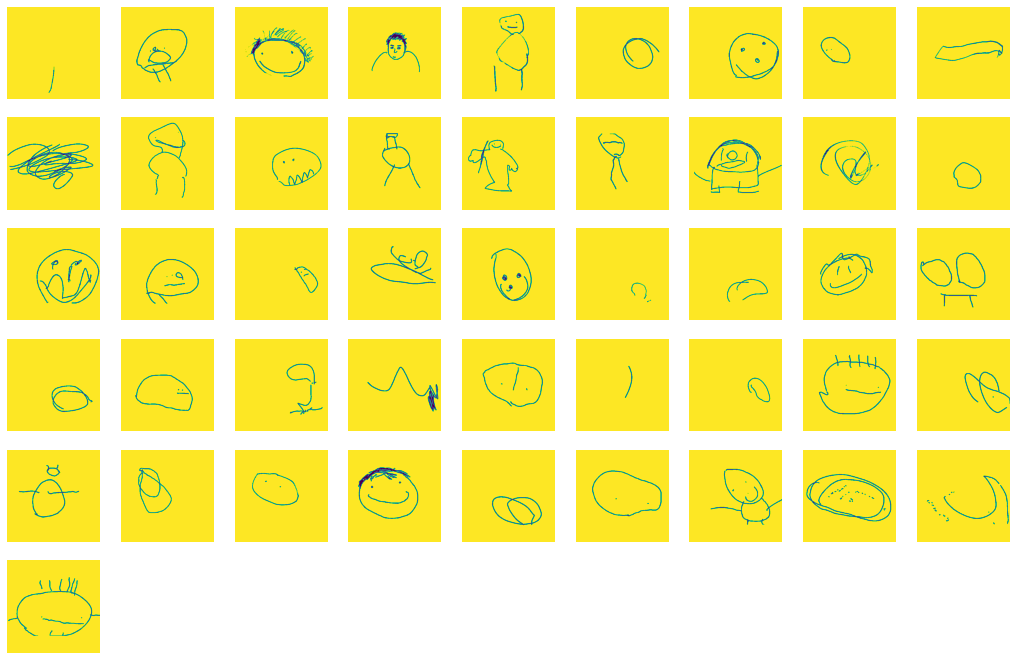

In [ ]:
################################
# Plot cluster 5 Function approach
################################

# pick the cluster to plot
cluster = cluster_5

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_5'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 5

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_5

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_5_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 6

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_6))

12


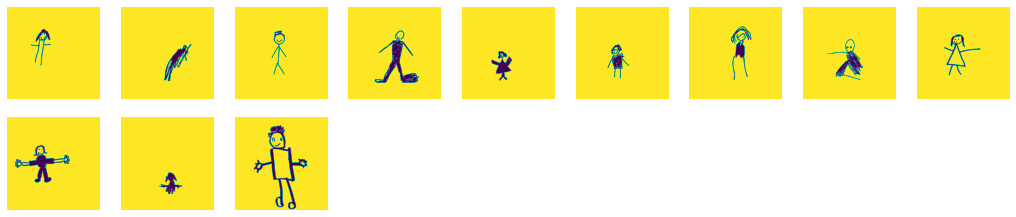

In [ ]:
################################
# Plot cluster 6 Function approach
################################

# pick the cluster to plot
cluster = cluster_6

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_6'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 6

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_6

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_6_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 7

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_7))

17


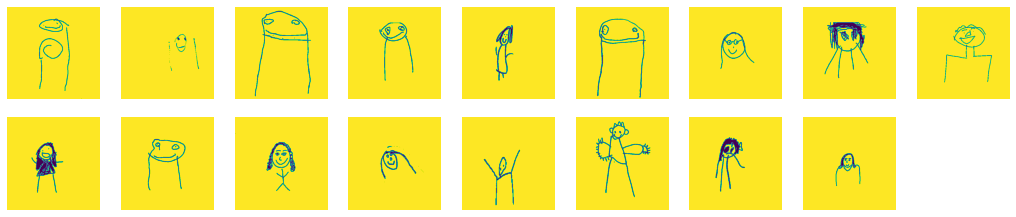

In [ ]:
################################
# Plot cluster 7 Function approach
################################

# pick the cluster to plot
cluster = cluster_7

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_7'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 7

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_7

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_7_fc2_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 8

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_8))

32


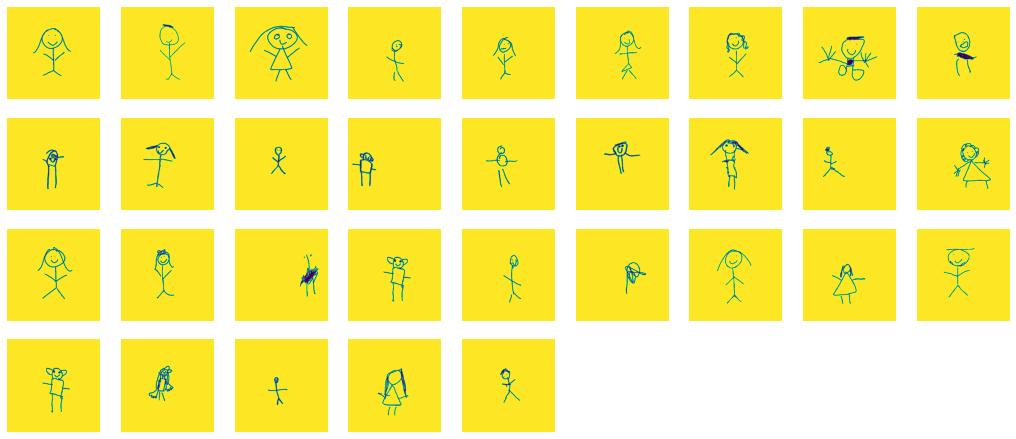

In [ ]:
################################
# Plot cluster 8 Function approach
################################

# pick the cluster to plot
cluster = cluster_8

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_8'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 8

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_8

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_8_fc2_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 9

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_9))

2


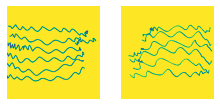

In [ ]:
################################
# Plot cluster 9 Function approach
################################

# pick the cluster to plot
cluster = cluster_9

# Define grid shape (for 53 images) 
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_9'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 9

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_9

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_9_fc2_drawings.png', dpi=200)
# plt.show()

### Plot Cluster 10

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_10))

4


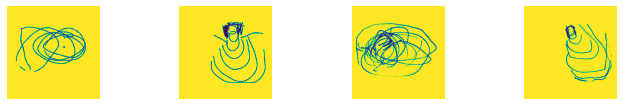

In [ ]:
################################
# Plot cluster 10 Function approach
################################

# pick the cluster to plot
cluster = cluster_10

# Define grid shape (for 53 images) 
nrows = 9
ncols = 6

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_10'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 10

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_10

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_10_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 11

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_11))

11


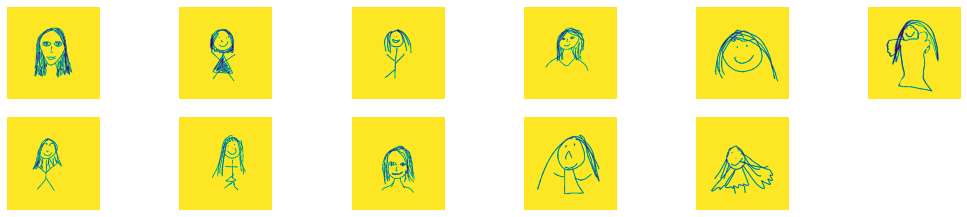

In [ ]:
################################
# Plot cluster 11 Function approach
################################

# pick the cluster to plot
cluster = cluster_11

# Define grid shape (for 53 images) 
nrows = 9
ncols = 6

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_11'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_11_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 12

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_12))

11


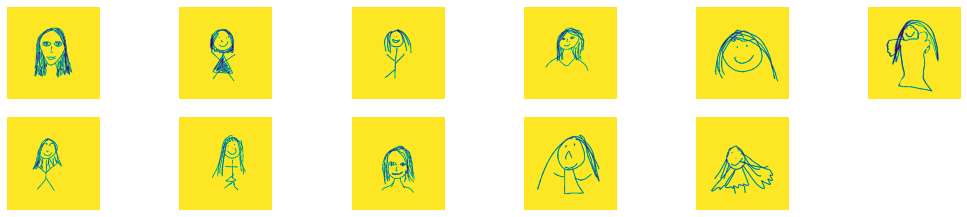

In [ ]:
################################
# Plot cluster 11 Function approach
################################

# pick the cluster to plot
cluster = cluster_12

# Define grid shape 
nrows = 9
ncols = 6

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_12'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_11_fc2_drawings_DAP.png', dpi=200)
# plt.show()



```
# This is formatted as code
```

### Plot Cluster 13

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_13))

11


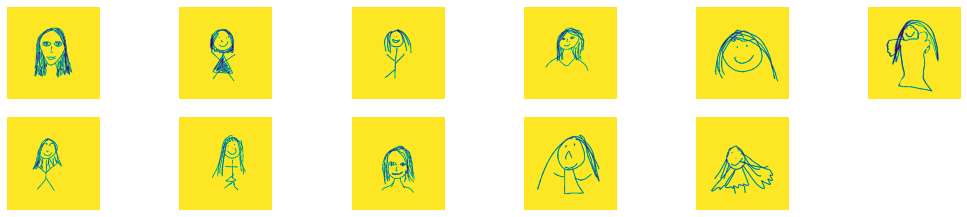

In [ ]:
################################
# Plot cluster 11 Function approach
################################

# pick the cluster to plot
cluster = cluster_13

# Define grid shape 
nrows = 9
ncols = 6

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_13'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_11_fc2_drawings_DAP.png', dpi=200)
# plt.show()

### Plot Cluster 14

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_14))

11


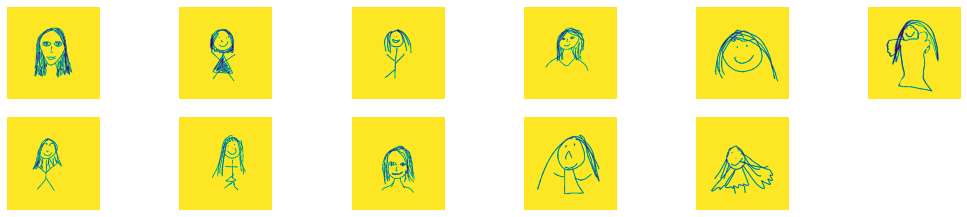

In [ ]:
################################
# Plot cluster 14 Function approach
################################

# pick the cluster to plot
cluster = cluster_14

# Define grid shape 
nrows = 9
ncols = 6

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_fc2_14clust_450_256/'
    

cluster_name = 'cluster_14'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
# # Plot Cluster Save in Local Colab Version -- these files will have to be downloaded, and will be deleted when Colab is inactivated

# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_11_fc2_drawings_DAP.png', dpi=200)
# plt.show()